**  1. Lead Scoring Case Study - Prediction of Hot Leads for an Education Company X**

Importing necessary Libraries

In [6]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## reading the data

In [7]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)
#to get all rows, columns during EDA

In [8]:
df_leads = pd.read_csv("/content/Leads.csv")

In [9]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [10]:
df_leads.shape

(9240, 37)

The original dataframe has 9240 rows and 37 columns

In [11]:
## Data Understanding

In [12]:
#  To Check summary of all numerical columns
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [13]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#As we can see from above and as per data sheet given many columns have single value in colmn which can be ddemed useless for our analysis

In [14]:
# Checking the data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are null values in df , same to be handled

In [15]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [16]:
# Check the column wise null percentages.

leads_null_fields=round((df_leads.isna().sum())/len(df_leads.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [ ]:
## Data Cleaning

In [18]:
# List of columns having 'Select' as value
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [19]:
 df_leads = df_leads.replace('Select', np.nan)
 # Converting 'Select' values to NaN.

In [20]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


In [ ]:
## So There are No Select values in the entire data set

##Handling the Missing Values

In [21]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=40):

    missing_perc = round((df_leads.isna().sum())/len(df_leads.index) * 100,2)

    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)

    data.drop(labels=col_to_drop,axis=1, inplace=True)

    print("Shape after dropping columns: ",data.shape)

In [22]:
# dropping columns not needed as per our defined function
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [24]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      Unemployed   
1   India                      NaN                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                      NaN                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of 

We can drop columns with single uniques value since they do not help in our analysis any further

In [30]:
df_leads=df_leads.drop('Magazine' , axis = 1)


In [32]:
df_leads.shape


(9240, 29)

In [35]:
df_leads=df_leads.drop('Receive More Updates About Our Courses' , axis = 1)

In [36]:
df_leads=df_leads.drop('Update me on Supply Chain Content' , axis = 1)

In [37]:
df_leads=df_leads.drop('Get updates on DM Content' , axis = 1)

In [38]:
df_leads=df_leads.drop('I agree to pay the amount through cheque' , axis = 1)

In [39]:
df_leads.shape

(9240, 25)

Now we are left with 25 columns

In [40]:
# Checking for  the percentage of null values in remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Prospect ID                                       0.0000

In [ ]:
###  Columns with Categorical Data

In [41]:
# Selecting the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [ ]:
# To understand what to impute in missing values,we must study values present in each of these columns with missing values

In [42]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

###Insights:
City: City has 39.70 % missing values. Imputing missing values with Mumbai can cause bias in the model. Hence City column can be dropped.

Specialization: Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called 'Others'.

Tags: Tags has 36.28 % missing values.20% ringig .Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

What matters most to you in choosing a course: It has 29.31 % missing values. 99.95% customers have selected 'better career prospects'. This will not provide any insight.

What is your current occupation: We can impute the missing values with 'Unemployed' as it has the most values.

Lead Source -Google has 31.160365% cotribution,direct traffic- 27% we can say google for remaining missing  values

Country: X Education sells online courses and appx 96% of the customers are from India. Hence `Country column can be dropped.

Similarly we can impute Last Activityas'Email Opened',
What is your current occupation as  'Unemployed'

In [43]:
# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','What matters most to you in choosing a course','Country'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 25)
After Drop (9240, 21)


Imputing the following columns

'Specialization',
'Lead Source',
'Last Activity',
'What is your current occupation'

In [44]:
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [45]:
# percentage of null values for remaining columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Prospect ID                               0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
Search                                    0.00
Last Activity                             0.00
Specialization                            0.00
Lead Number                               0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Lead Source                               0.00
Lead Origin                               0.00
Last Notable Activity                     0.00
dtype: float6

#Columns with Numerical Data

In [46]:
# TotalVisits
print("TotalVisits - Value Counts \n")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts 



0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [47]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [48]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts \n")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts 



0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [49]:
# Page Views Per Visit missing values to be imputed with mode
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [50]:
# Checking the percentage of null values after handling categorical and numerical columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                               0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Last Activity                             0.0
Lead Number                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Last Notable Activity                     0.0
dtype: float64

#handling missing  values  part was  completed

In [51]:
###Removing Unwanted Columns

In [ ]:
### Dropping the columns which do not add value to the model - 'Prospect ID','Lead Number','Last Notable Activity'¶

In [52]:
# Dropping Columns
print("Before Dropping ",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping ",df_leads.shape)

Before Dropping  (9240, 21)
After Dropping  (9240, 18)


In [ ]:
## Checking & Dropping Category Columns that are Skewed¶

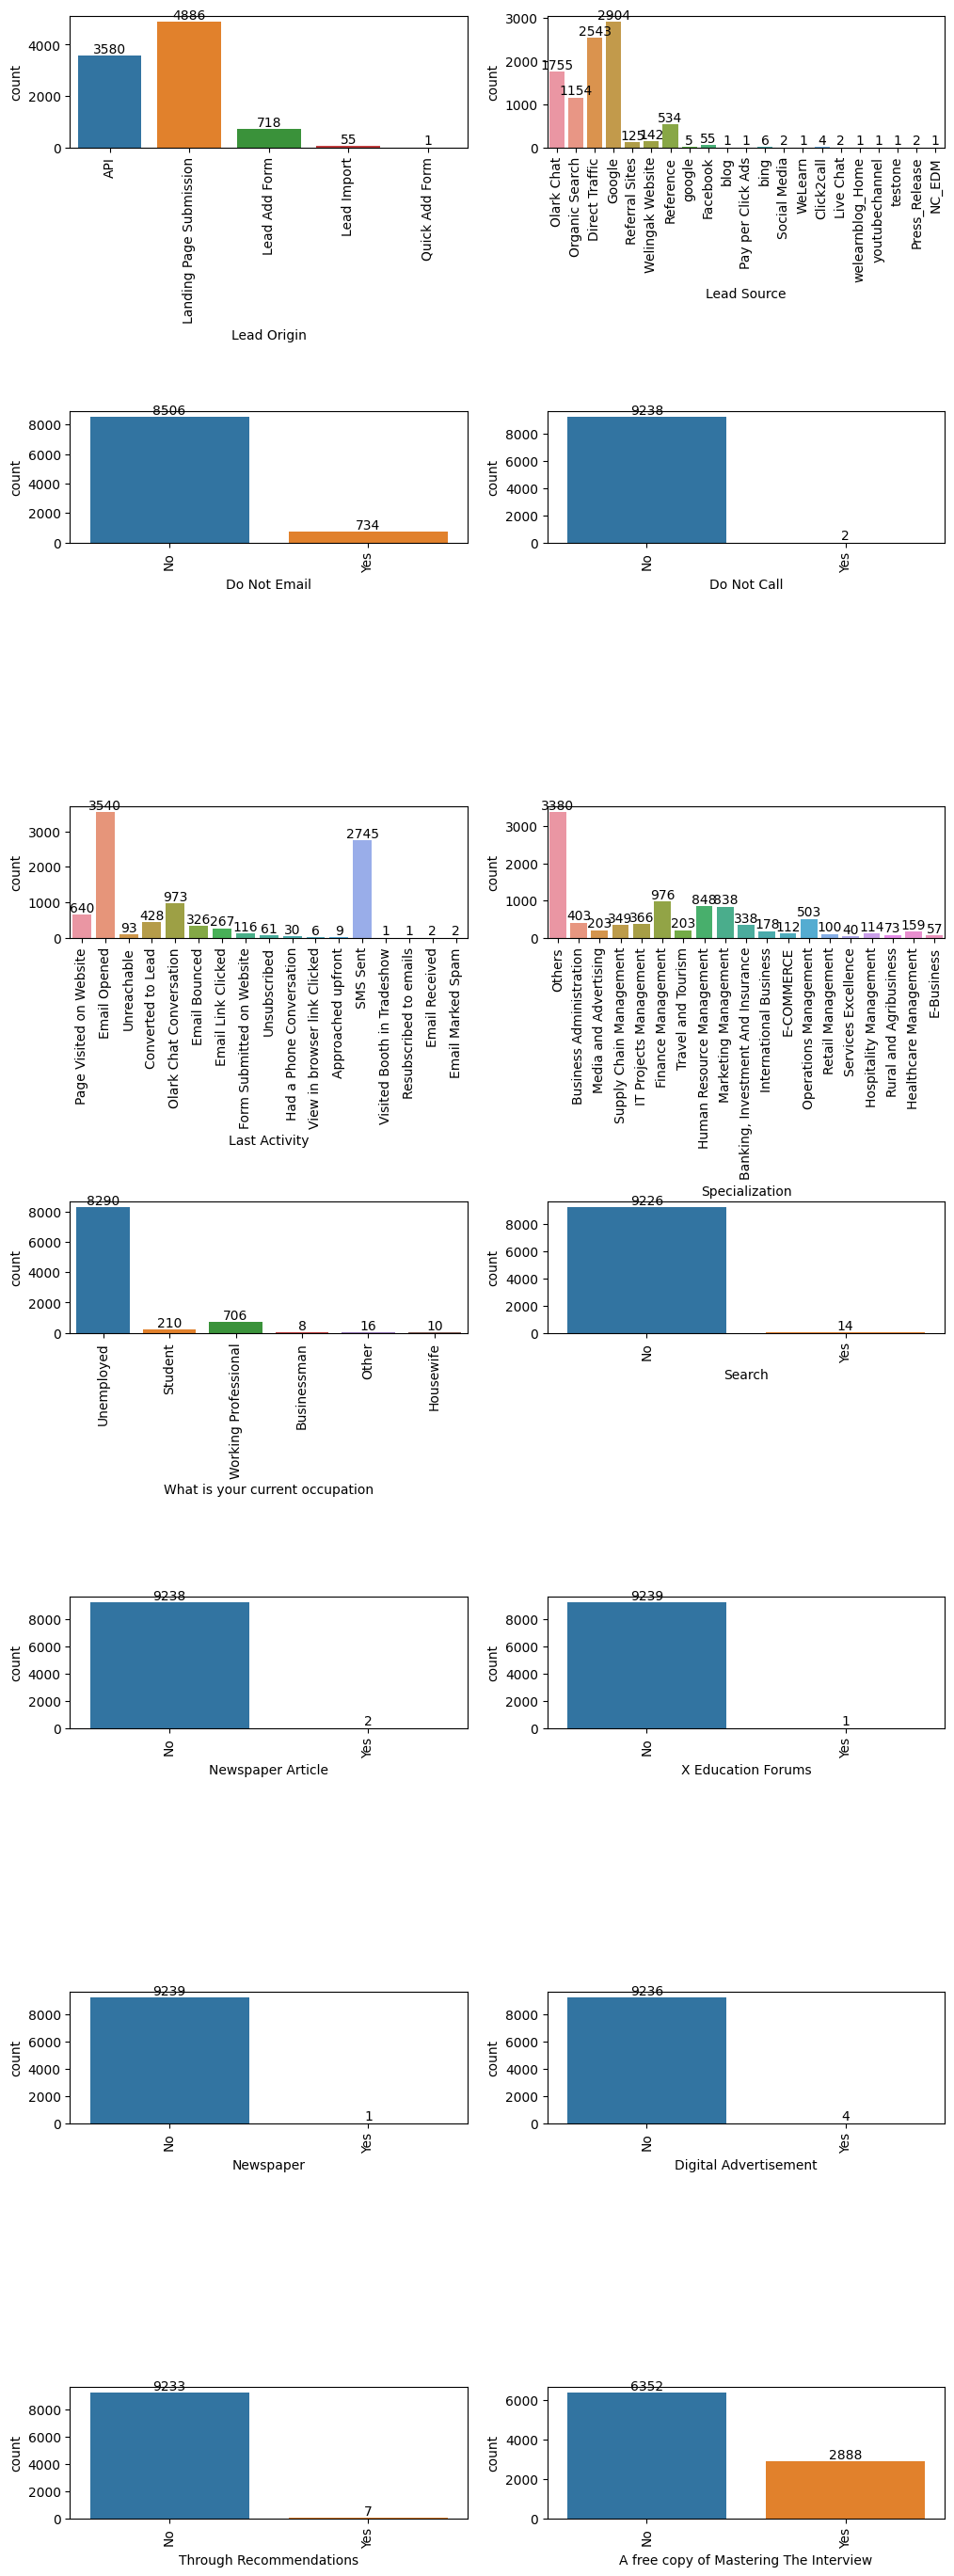

In [54]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads)
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [55]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [56]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

Outlier Analysis

In [57]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

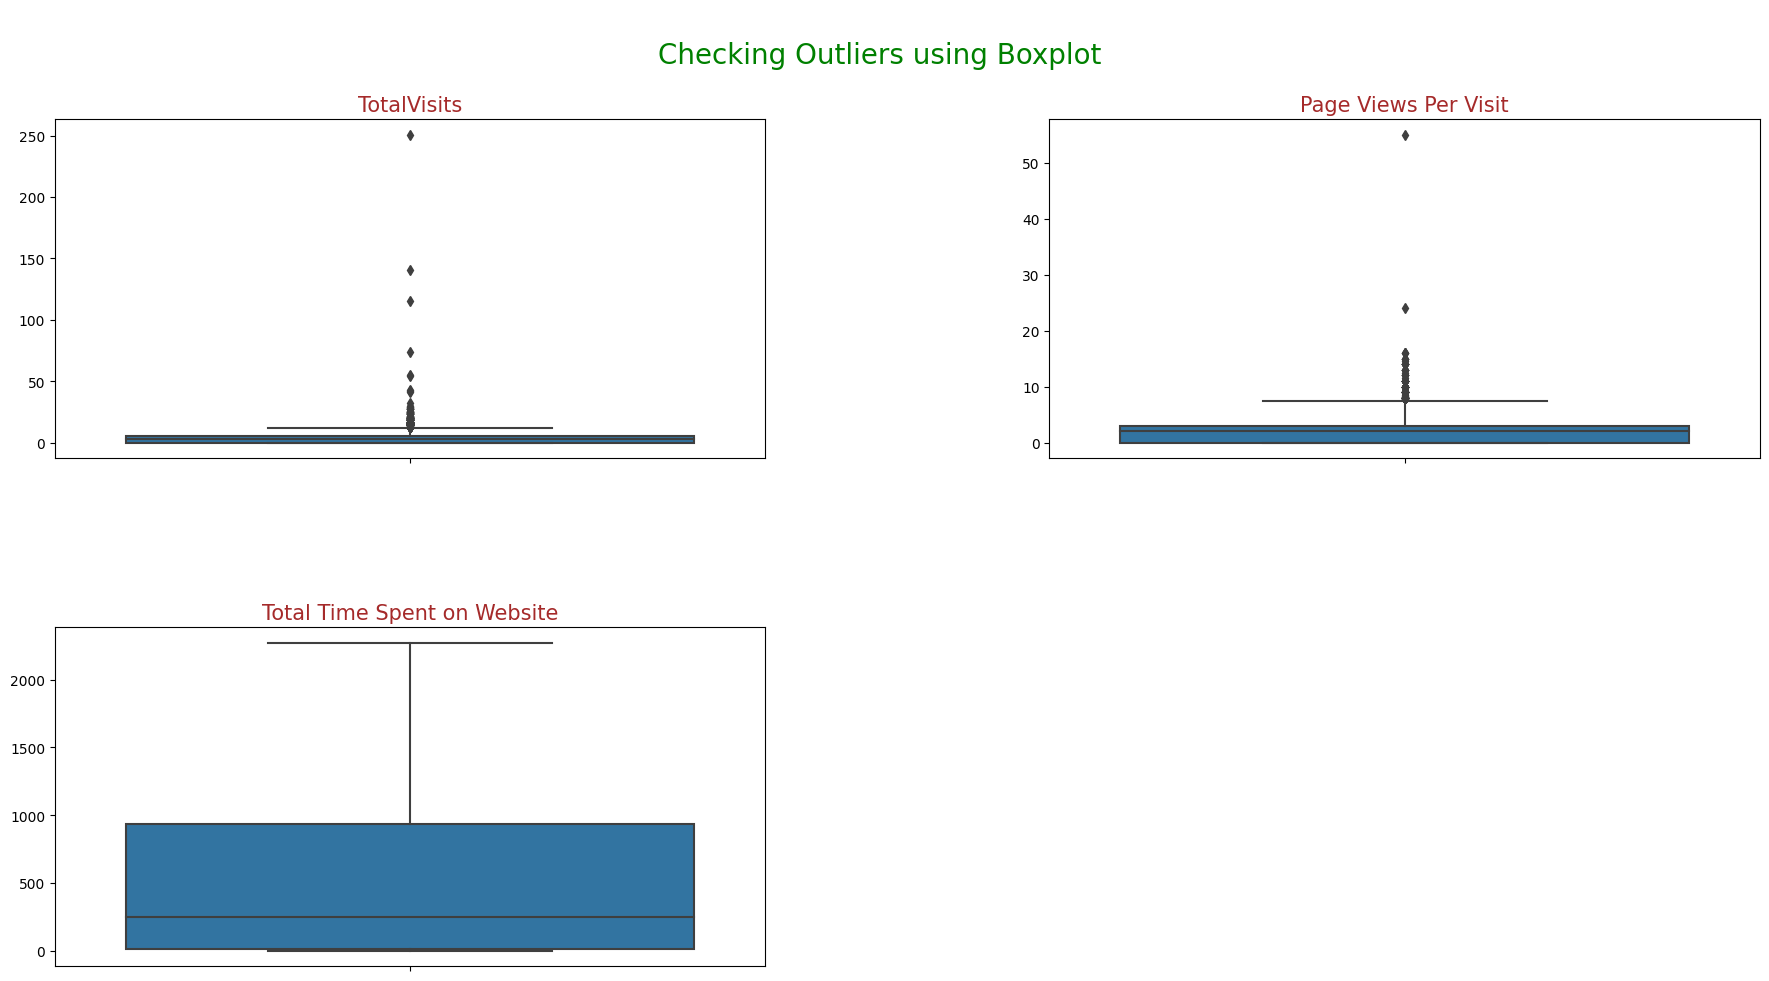

In [58]:
# Checking outliers for numerical variables other than target variable
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols)

#"TotalVisits","Page Views Per Visit":Both these variables contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables

In [59]:
df_leads.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [60]:
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [61]:
# Checking outliers for numerical variables other than target variable
capping_cols = ["TotalVisits","Page Views Per Visit"]
Outlier_treatment(df_leads,capping_cols)

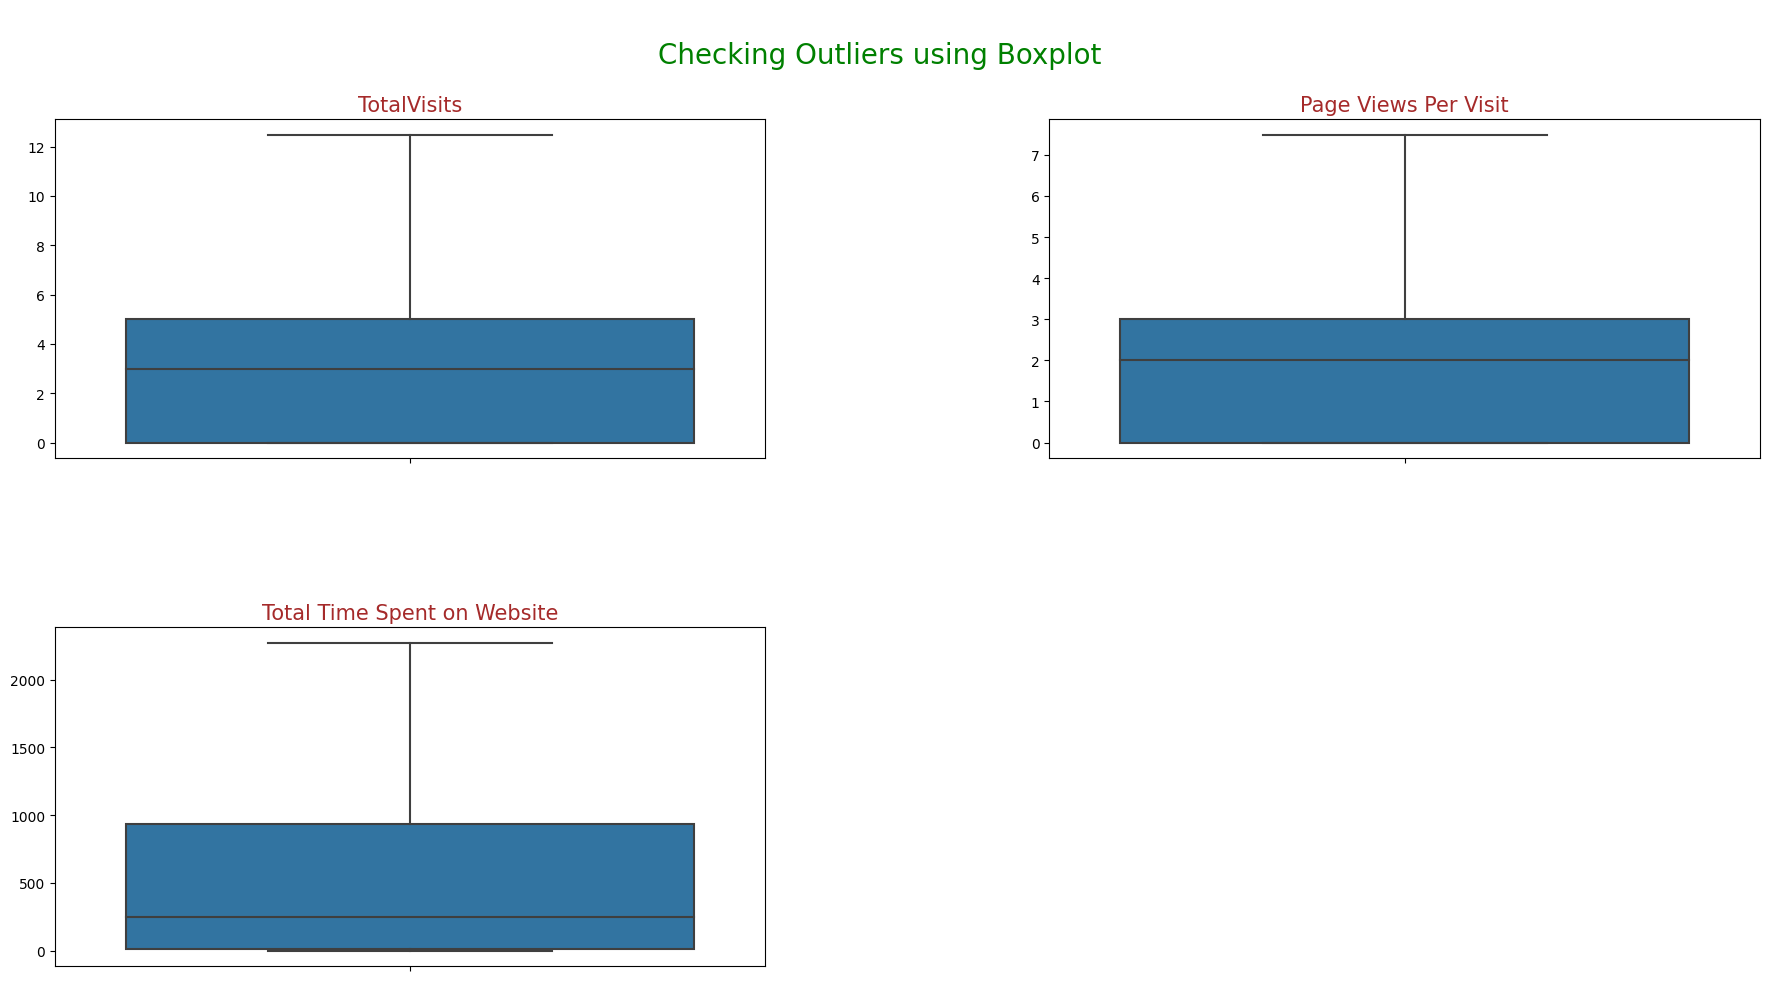

In [62]:
# Checking Boxplot after Outlier
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols)

In [63]:
# after outlier treatment  percentile values are
df_leads.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
max                7.500000

Fixing Invalid values and Standardising Data in columns

In [64]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [65]:
## Categorical Variables

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("% of valuecounts for :",i,"\n")
        print(perc,"\n")
        print("--"*25,"\n")

% of valuecounts for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

-------------------------------------------------- 

% of valuecounts for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
N

Grouping Low frequency values

In [66]:
# "Google" & "google" are same in "Lead Source",  we will standardise the case
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [67]:
df_leads["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [68]:
#"Last Activity" columns have very few records. We will group these categories together under "Others".
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [69]:
df_leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [70]:
# Renaming column names to "Curr_occupation" from "What is your current occupation"  to "Freecopy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Freecopy'}, inplace=True)
df_leads.rename(columns={'What is your current occupation': 'Curr_occupation'}, inplace=True)


In [71]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Curr_occupation Freecopy  
0  Page Visited on Website                   Others      Unemployed       No  
1             Email Opened                   Others      Unemployed       No  
2             Email Opened  Business Administration         Student      Yes  
3                   Others    Media and Advertising      Unemployed       No  
4        Converted to Lead                   Others      Unemployed       No

Mapping Binary categorical variables - Columns "Do not email" and "Freecopy"

In [72]:
# Mapping binary categorical variables
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
df_leads['Freecopy'] = df_leads['Freecopy'].apply(lambda x: 1 if x =='Yes' else 0)

In [73]:
#### Checking Data-types of variables
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Curr_occupation              9240 non-null   object 
 10  Freecopy                     9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


####EXPLORATORY DATA ANALYSIS PART

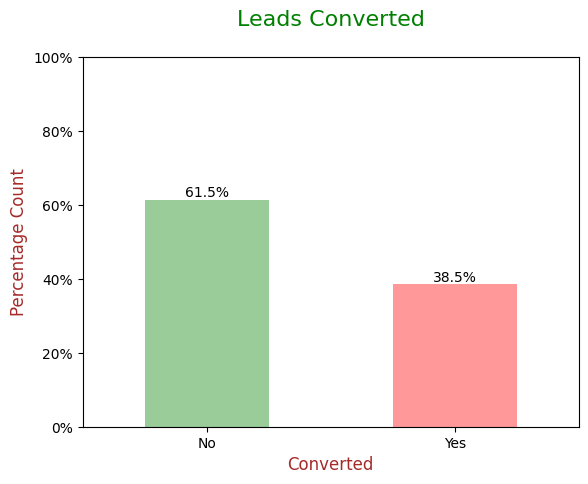

In [74]:
# TARGET VARIABLE " CONVERTED "
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()


NOTE:

Conversion rate is 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)
While 61.5% of the people didnt convert to leads. (Majority)

In [75]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


# Univariate Analysis

In [76]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Curr_occupation  Freecopy  
0  Page Visited on Website                   Others      Unemployed         0  
1             Email Opened                   Others      Unemployed         0  
2             Email Opened  Business Administration         Student         1  
3                   Others    Media and Advertising      Unemployed         0  
4        Converted to Lead                   Others      Unemployed         0

Univariate Analysis for Categorical Variables

In [78]:
#List of categorical columns
cat_cols = ["Lead Origin","Curr_occupation","Do Not Email","Freecopy","Lead Source","Last Activity","Specialization"]

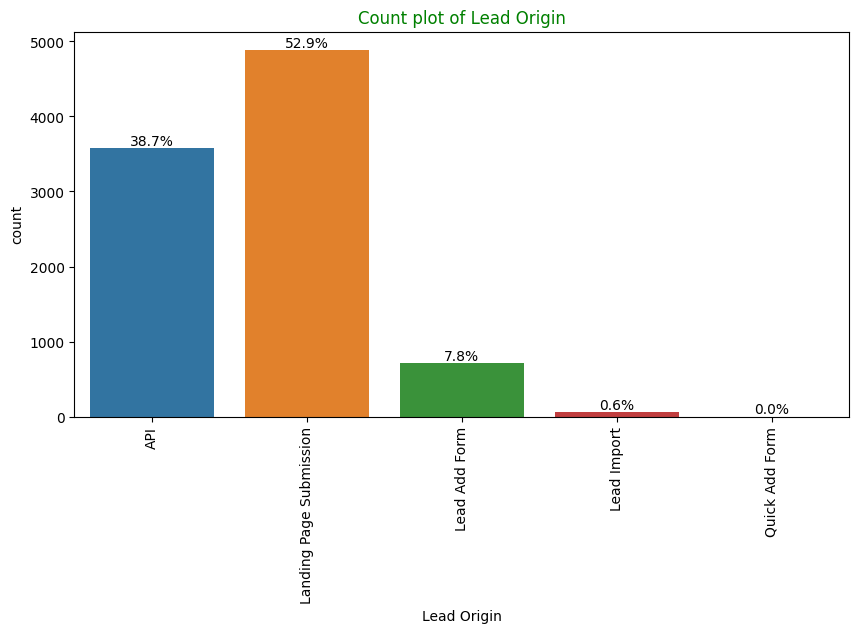

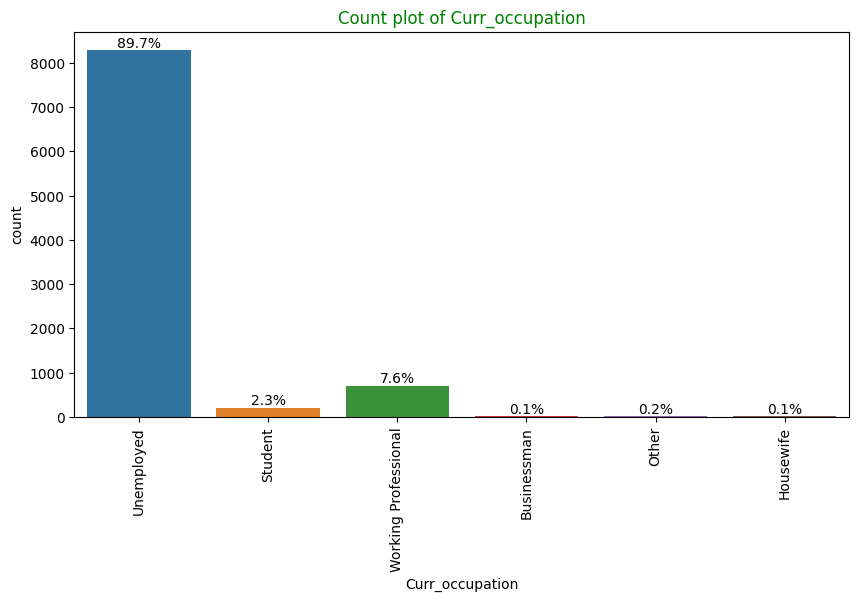

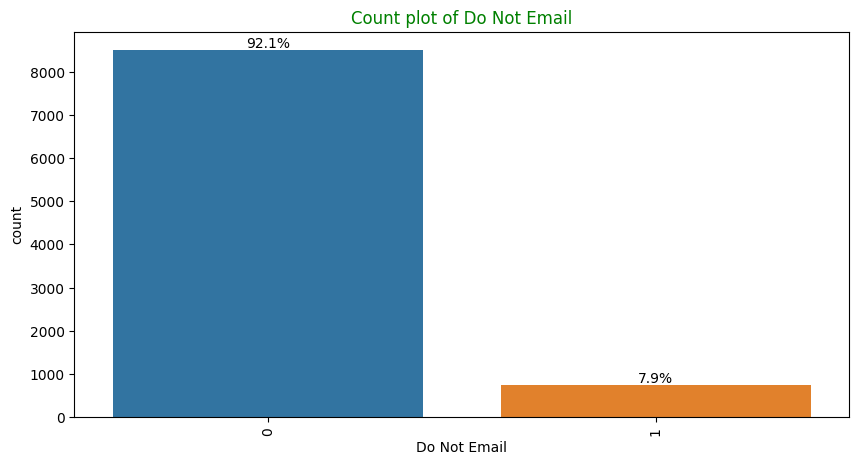

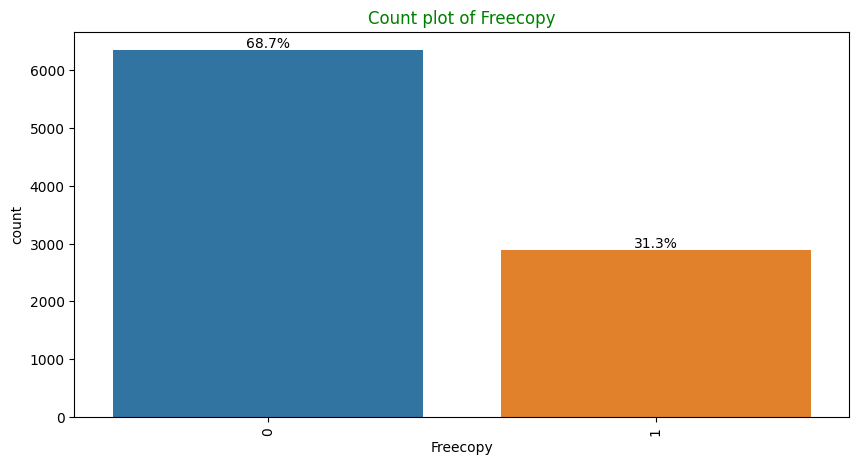

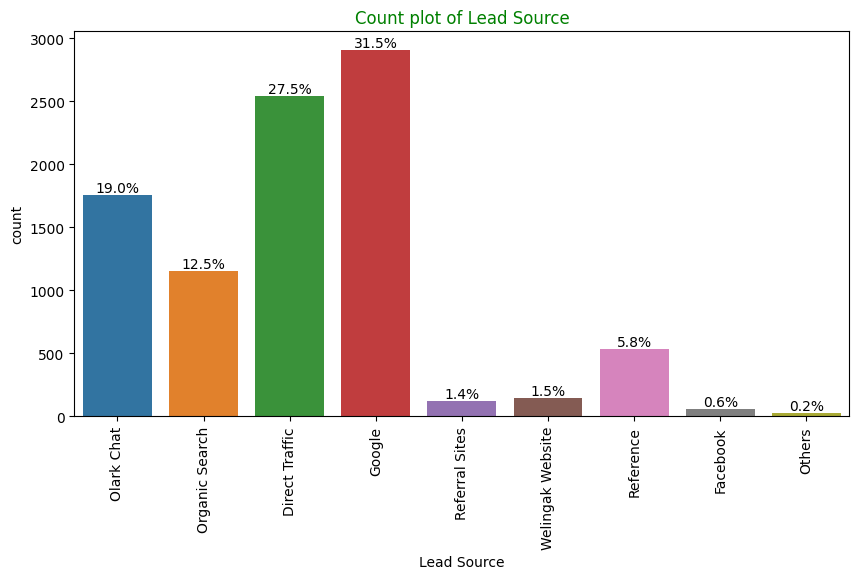

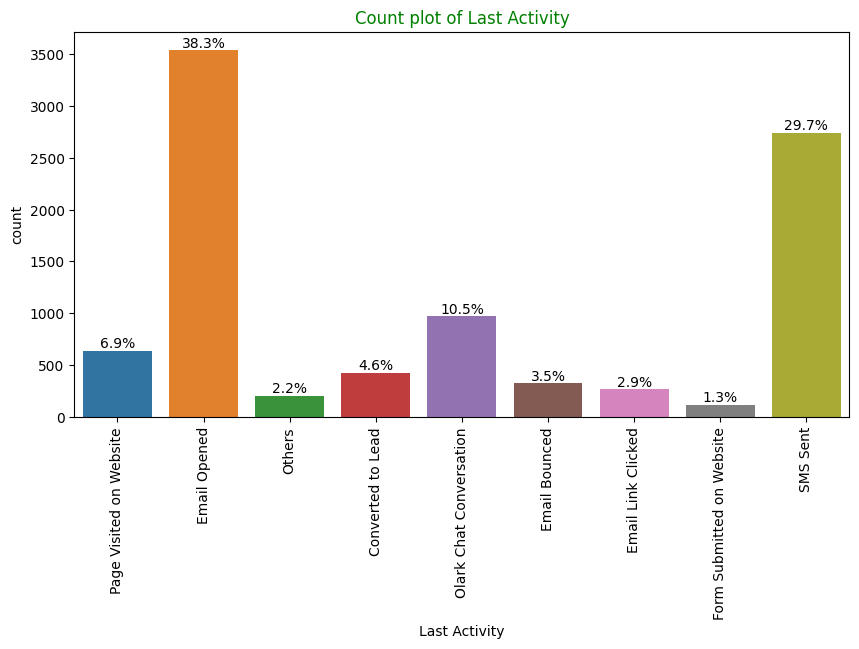

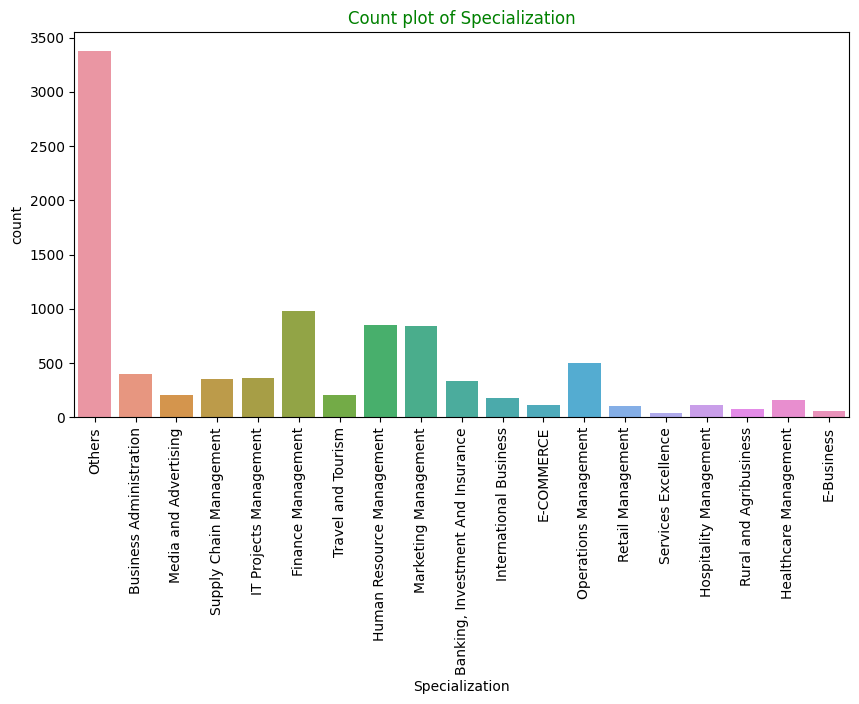

In [80]:
# Barplot for columns from cat_cols
for i in cat_cols[:]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)


    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


NOTE:

In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.
Observations from variables which are present in majority

Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.

Current_occupation: 90% of the customers as Unemployed

Do Not Email: 92% of the people opted that they dont want to be emailed about the course.

Lead Source: 58% Lead source is from Google & Direct Traffic combined

Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

* Bivariate Analysis**

Bivariate Analysis for Categorical Variables

In [81]:
def Bivar_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)

    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)

    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")

    # Annotation for 1st plot
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation

    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")

    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


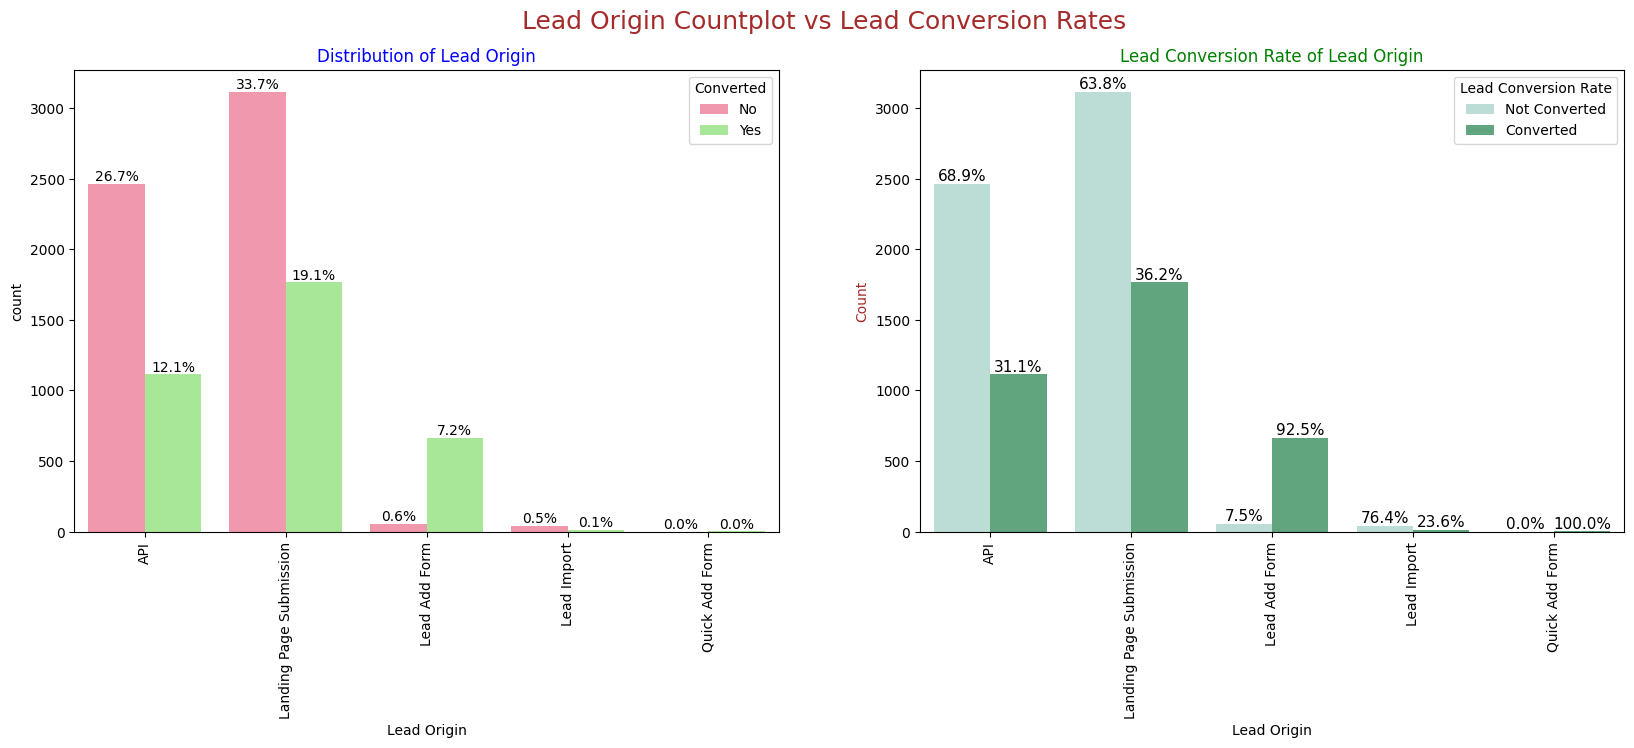

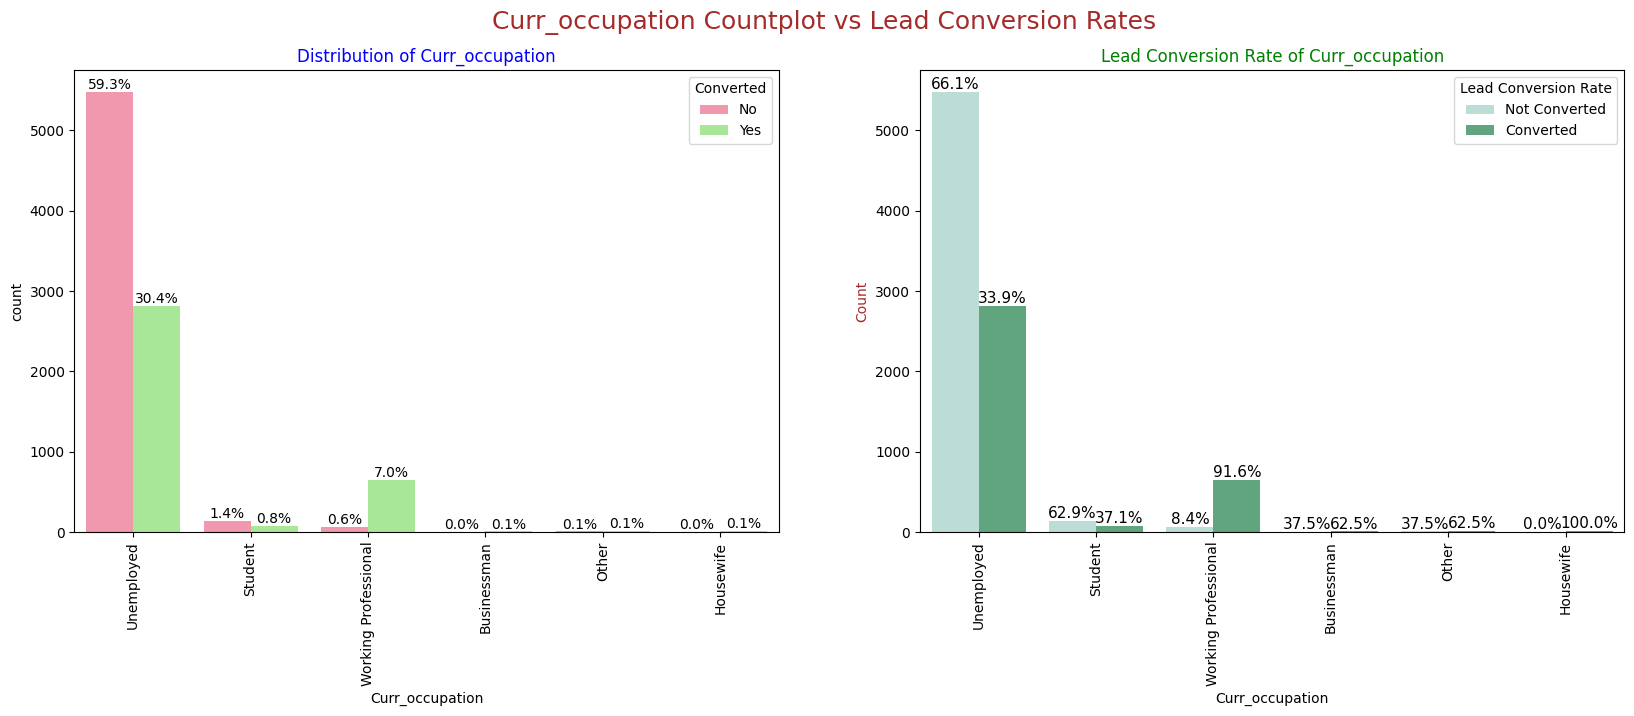

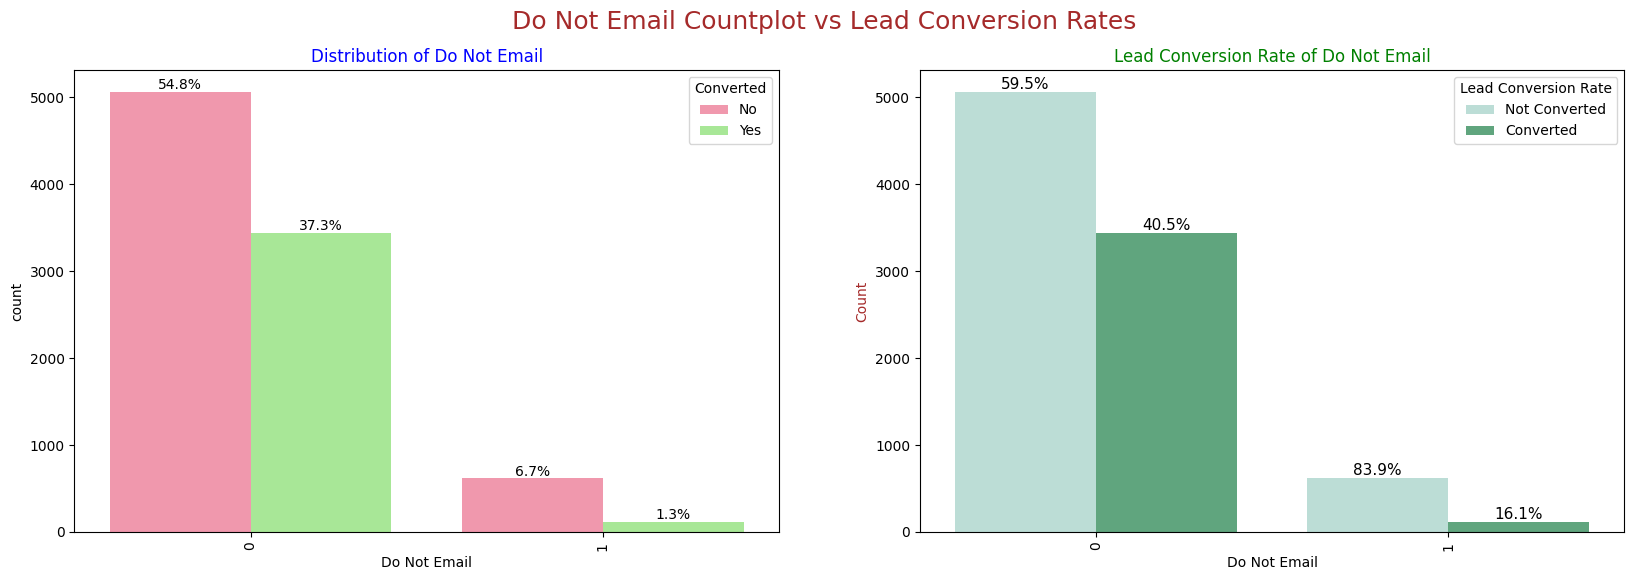

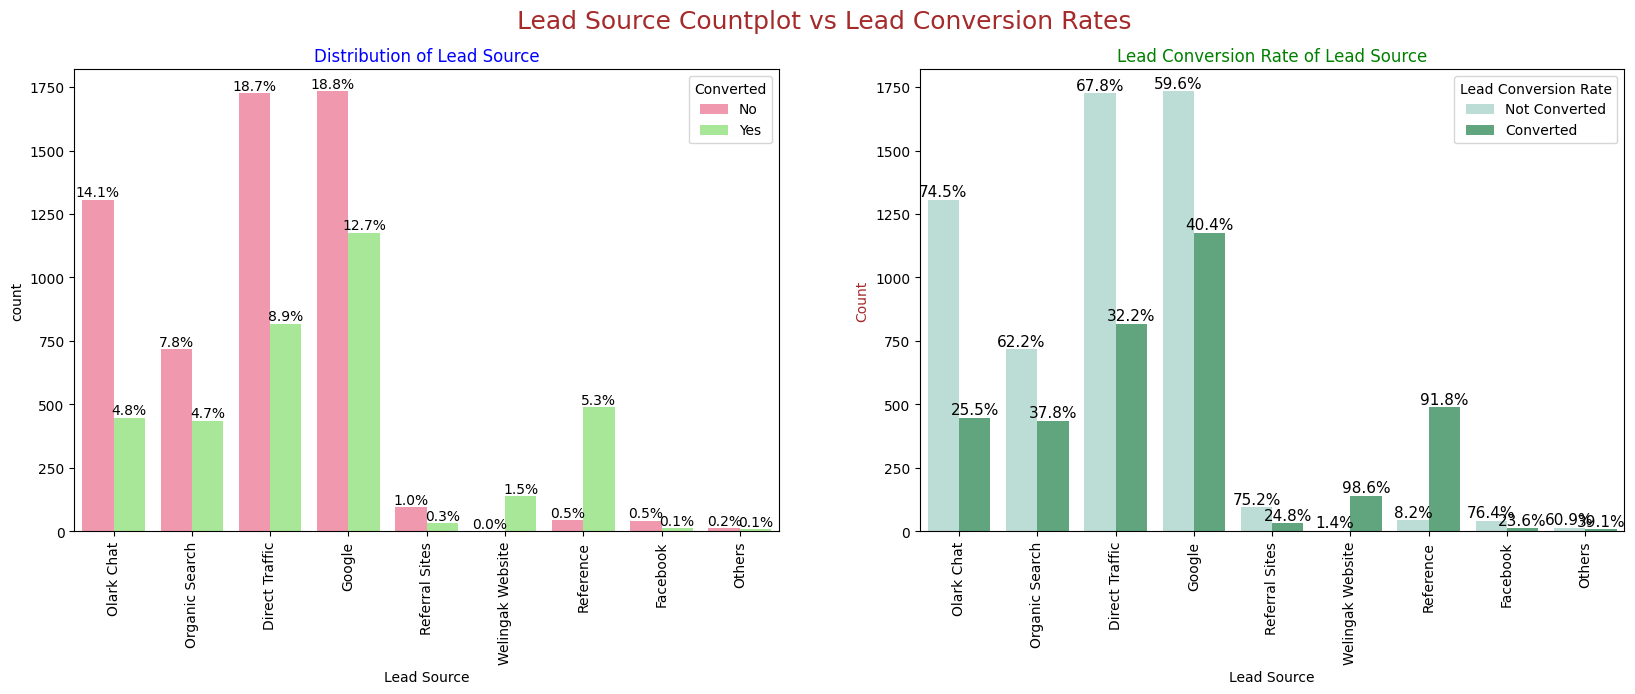

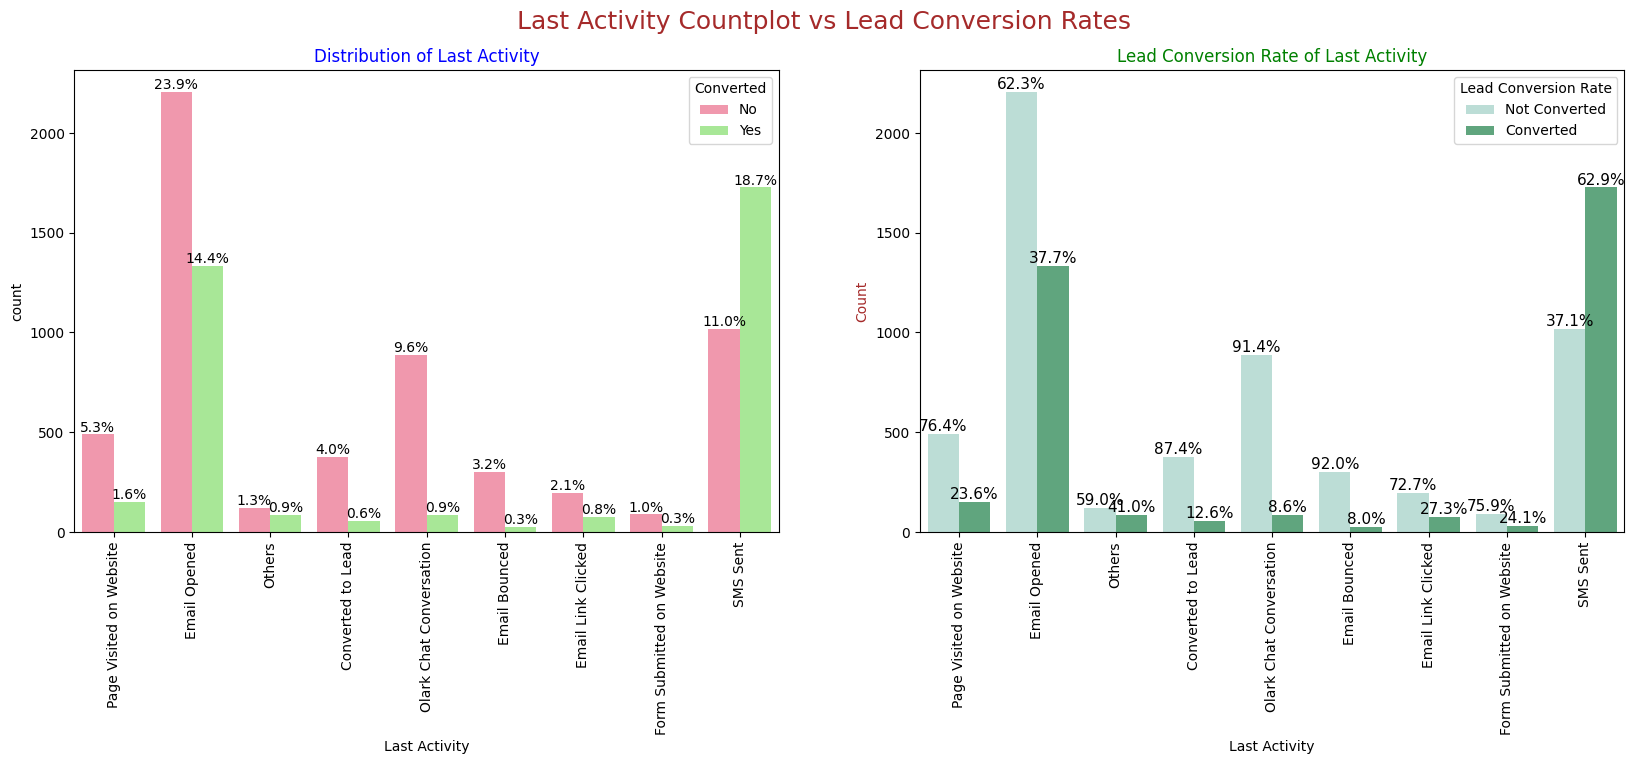

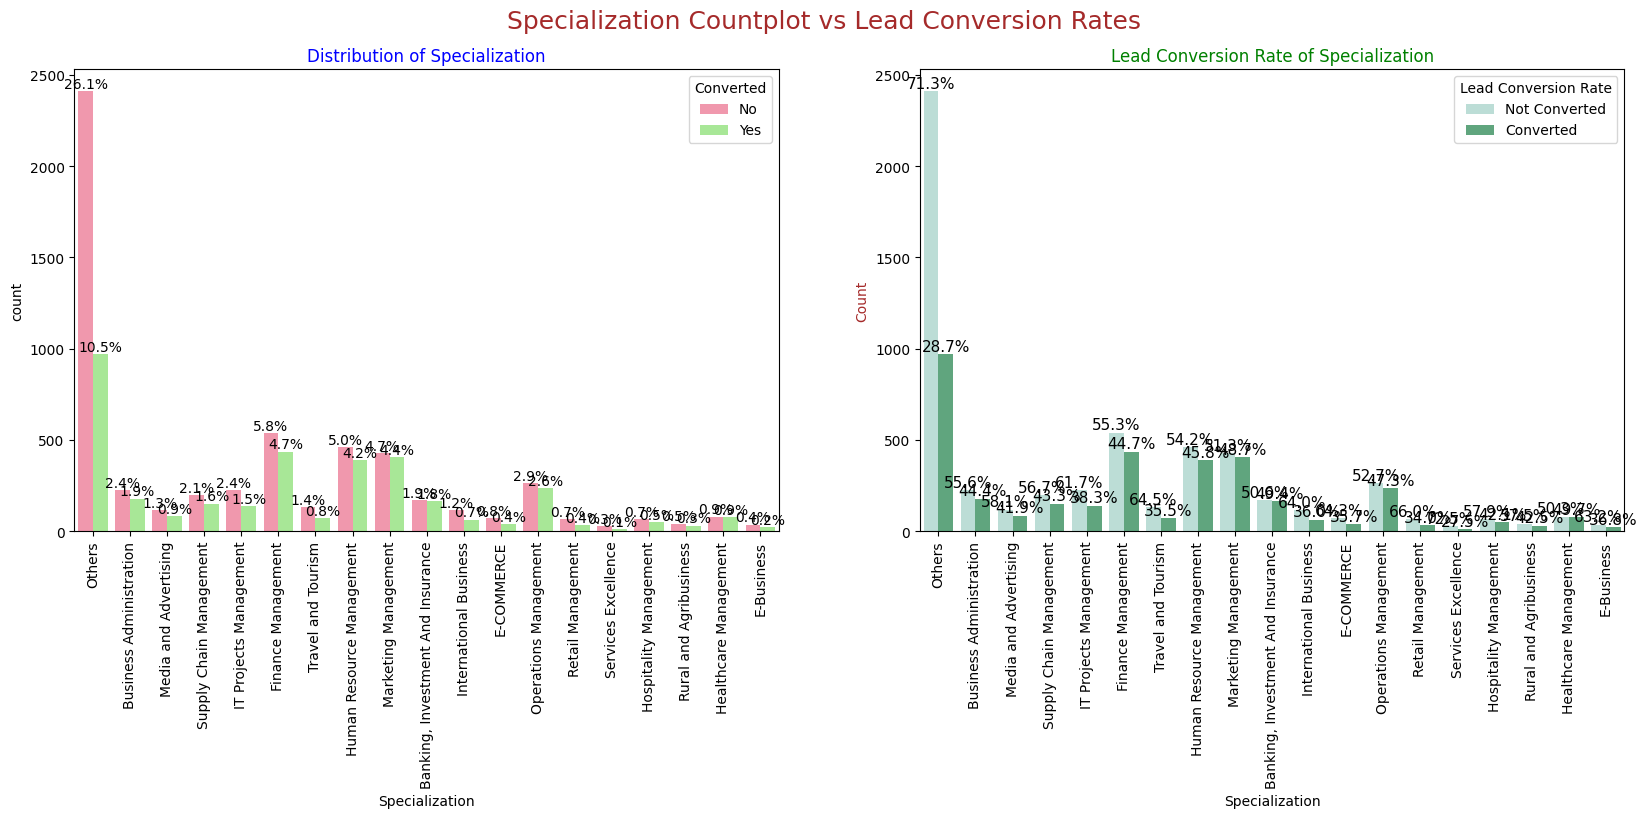

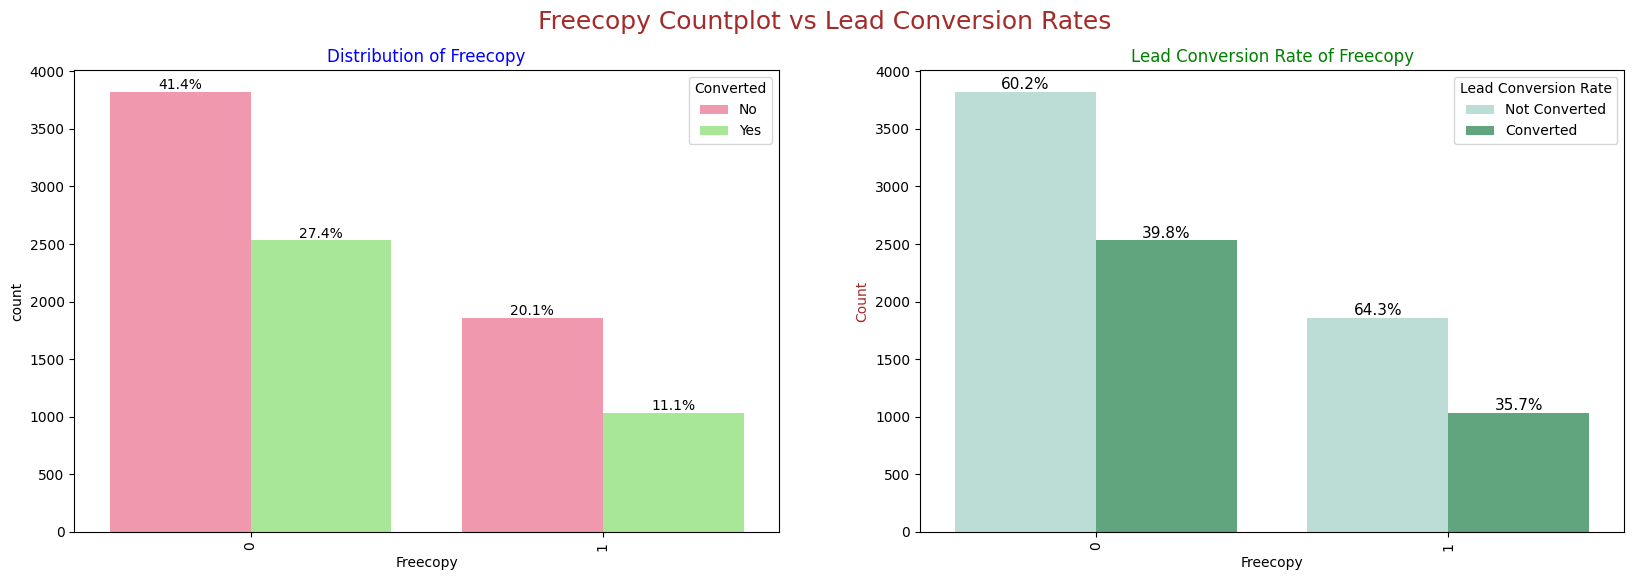

In [82]:
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Curr_occupation","Do Not Email","Lead Source","Last Activity","Specialization","Freecopy"]

for i in cat_cols:
    Bivar_cat(df_leads,variable_name=i)

## Observations:

Lead Origin: 52% of all leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%.The "API" identified approximately 39% of customers with a lead conversion rate (LCR) of 31%.

Current_occupation: 90% of the customers are Unemployed with lead conversion rate (LCR) of 34%. While Working Professional contribute only 7.6% of total customers with almost 92% lead conversion rate (LCR).

Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

Lead Source: Google has LCR of 40% out of 31% customers , Direct Traffic contributes 32% LCR with 27% customers, Organic Search_ also gives 37.8% of LCR ,Reference has LCR of 91%.

Last Activity: 'SMS Sent' has high LCR of 63% , 'Email Opened' activity has 37% LCR.

# Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

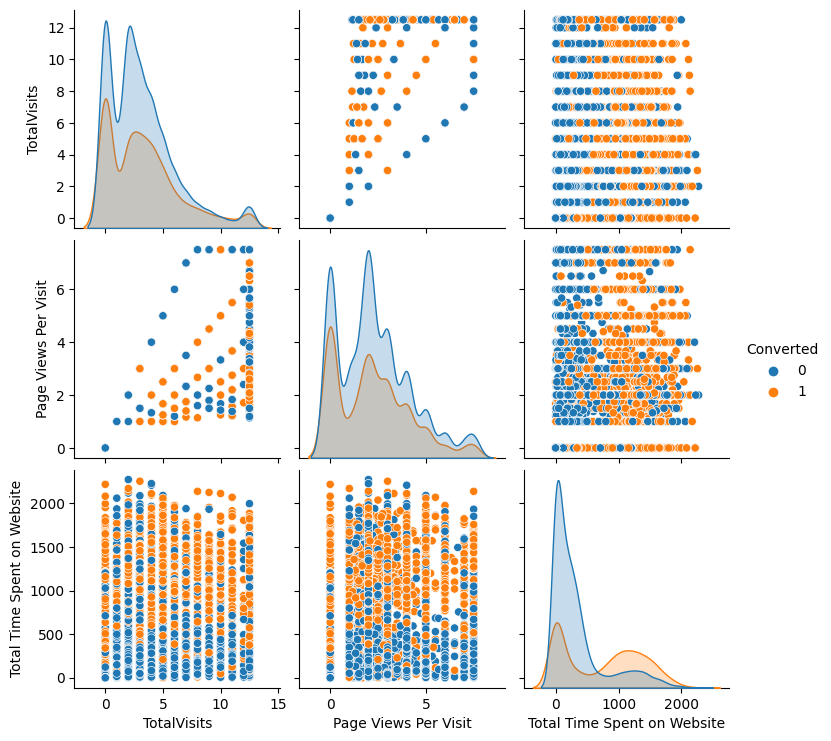

In [83]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")
plt.show()

In [ ]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

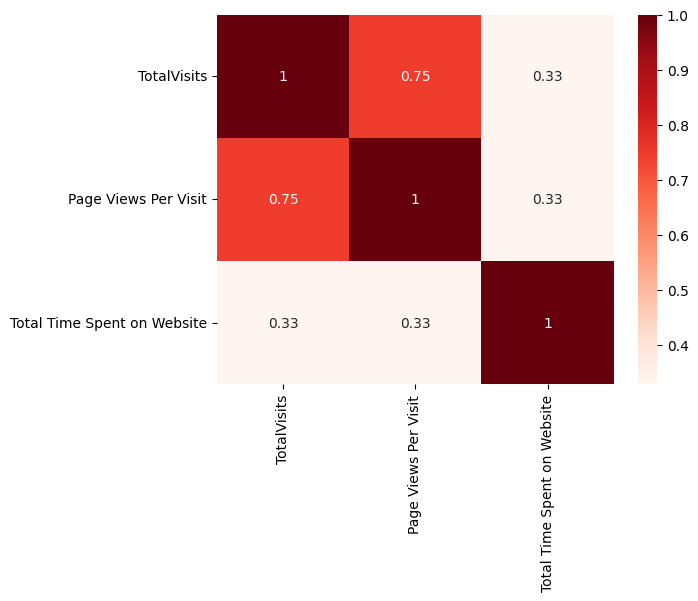

In [84]:
# Heatmap - correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Reds",annot=True)
plt.show()

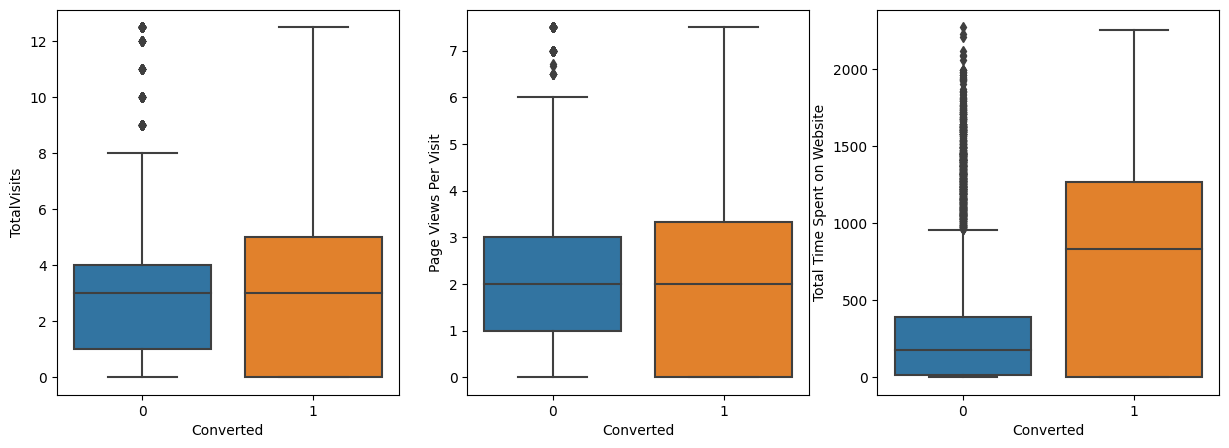

In [85]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

In [87]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Curr_occupation  Freecopy  
0  Page Visited on Website                   Others      Unemployed         0  
1             Email Opened                   Others      Unemployed         0  
2             Email Opened  Business Administration         Student         1  
3                   Others    Media and Advertising      Unemployed         0  
4        Converted to Lead                   Others      Unemployed         0

#Data Preparation¶

#Dummy Variables¶
For categorical variables with multiple levels, create dummy features

In [88]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyvar = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Curr_occupation"]], drop_first=True)

df_leads = pd.concat([df_leads, dummyvar], axis=1)

In [89]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Curr_occupation  Freecopy  \
0  Page Visited on Website                   Others      Unemployed         0   
1             Email Opened                   Others      Unemployed         0   
2             Email Opened  Business Administration         Student         1   
3                   Others    Media and Advertising      Unemployed         0   
4        Converted to Lead                   Others      Unemployed         0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                   

In [90]:
# dummies created for the variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Curr_occupation"],1)

In [91]:
df_leads.shape

(9240, 49)

In [93]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Freecopy                                  9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

In [94]:
df_leads.describe()

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9240.000000  9240.000000                  9240.000000   
mean       0.079437     0.385390     3.213853                   487.698268   
std        0.270435     0.486714     3.005136                   548.021466   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     0.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   248.000000   
75%        0.000000     1.000000     5.000000                   936.000000   
max        1.000000     1.000000    12.500000                  2272.000000   

       Page Views Per Visit     Freecopy  Lead Origin_Landing Page Submission  \
count           9240.000000  9240.000000                          9240.000000   
mean               2.274987     0.312554                             0.528788   
std                1.917776     0.463559                             0.499198   
min                0.000000     0.000000                             0.000000   
25%                0.000000     0.000000                             0.000000   
50%                2.000000     0.000000                             1.000000   
75%                3.000000     1.000000                             1.000000   
max                7.500000     1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                9240.000000              9240.000000   
mean                    0.077706                 0.005952   
std                     0.267722                 0.076926   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
count                 9240.000000           9240.000000         9240.000000   
mean                     0.000108              0.005952            0.314827   
std                      0.010403              0.076926            0.464472   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      0.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count             9240.000000                 9240.000000         9240.000000   
mean                 0.189935                    0.124892            0.002489   
std                  0.392271                    0.330614            0.049832   
min                  0.000000                    0.000000            0.000000   
25%                  0.000000                    0.000000            0.000000   
50%                  0.000000                    0.000000            0.000000   
75%                  0.000000                    0.000000            0.000000   
max                  1.000000                    1.000000            1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            9240.000000                 9240.000000   
mean                0.057792                    0.013528   
std                 0.233363                    0.115527   
min                 0.000000                    0.000000   
25%                 0.000000                    0.000000   
50%                 0.000000                    0.000000   
75%                 0.000000                    0.000000   
max                 1.000000                    1.000000   

       Lead Source_Welingak Website  Last

#  Test-Train Split



In [95]:
# Putting predictor variables to X and Putting Target variables to y
X = df_leads.drop('Converted', axis=1)
y = df_leads["Converted"]


In [96]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [98]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


# Scaling

In [99]:
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [100]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Freecopy  Lead Origin_Landing Page Submission  \
1871             -1.184892 -0.673169                                    0   
6795             -0.488713  1.485511                                    1   
3516              0.123715 -0.673169                                    0   
8105              1.432322 -0.673169                                    1   
3934             -1.184892 -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1871                      0                           0   
6795                      0                           0   
3516                      0                           0   
8105                      0                           0   
3934                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1871                             0                            0   
6795                             0                            0   
3516                             0                            0   
8105                             0                            0   
3934                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   
3934                                 0                           1   

      Last Activity_Form Submitted on Website  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105                                      0                     0   
3934                        

In [101]:
# Checking the Lead Conversion Rate (LCR) - Target variable is "Converted"

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

# Correlations among  variables

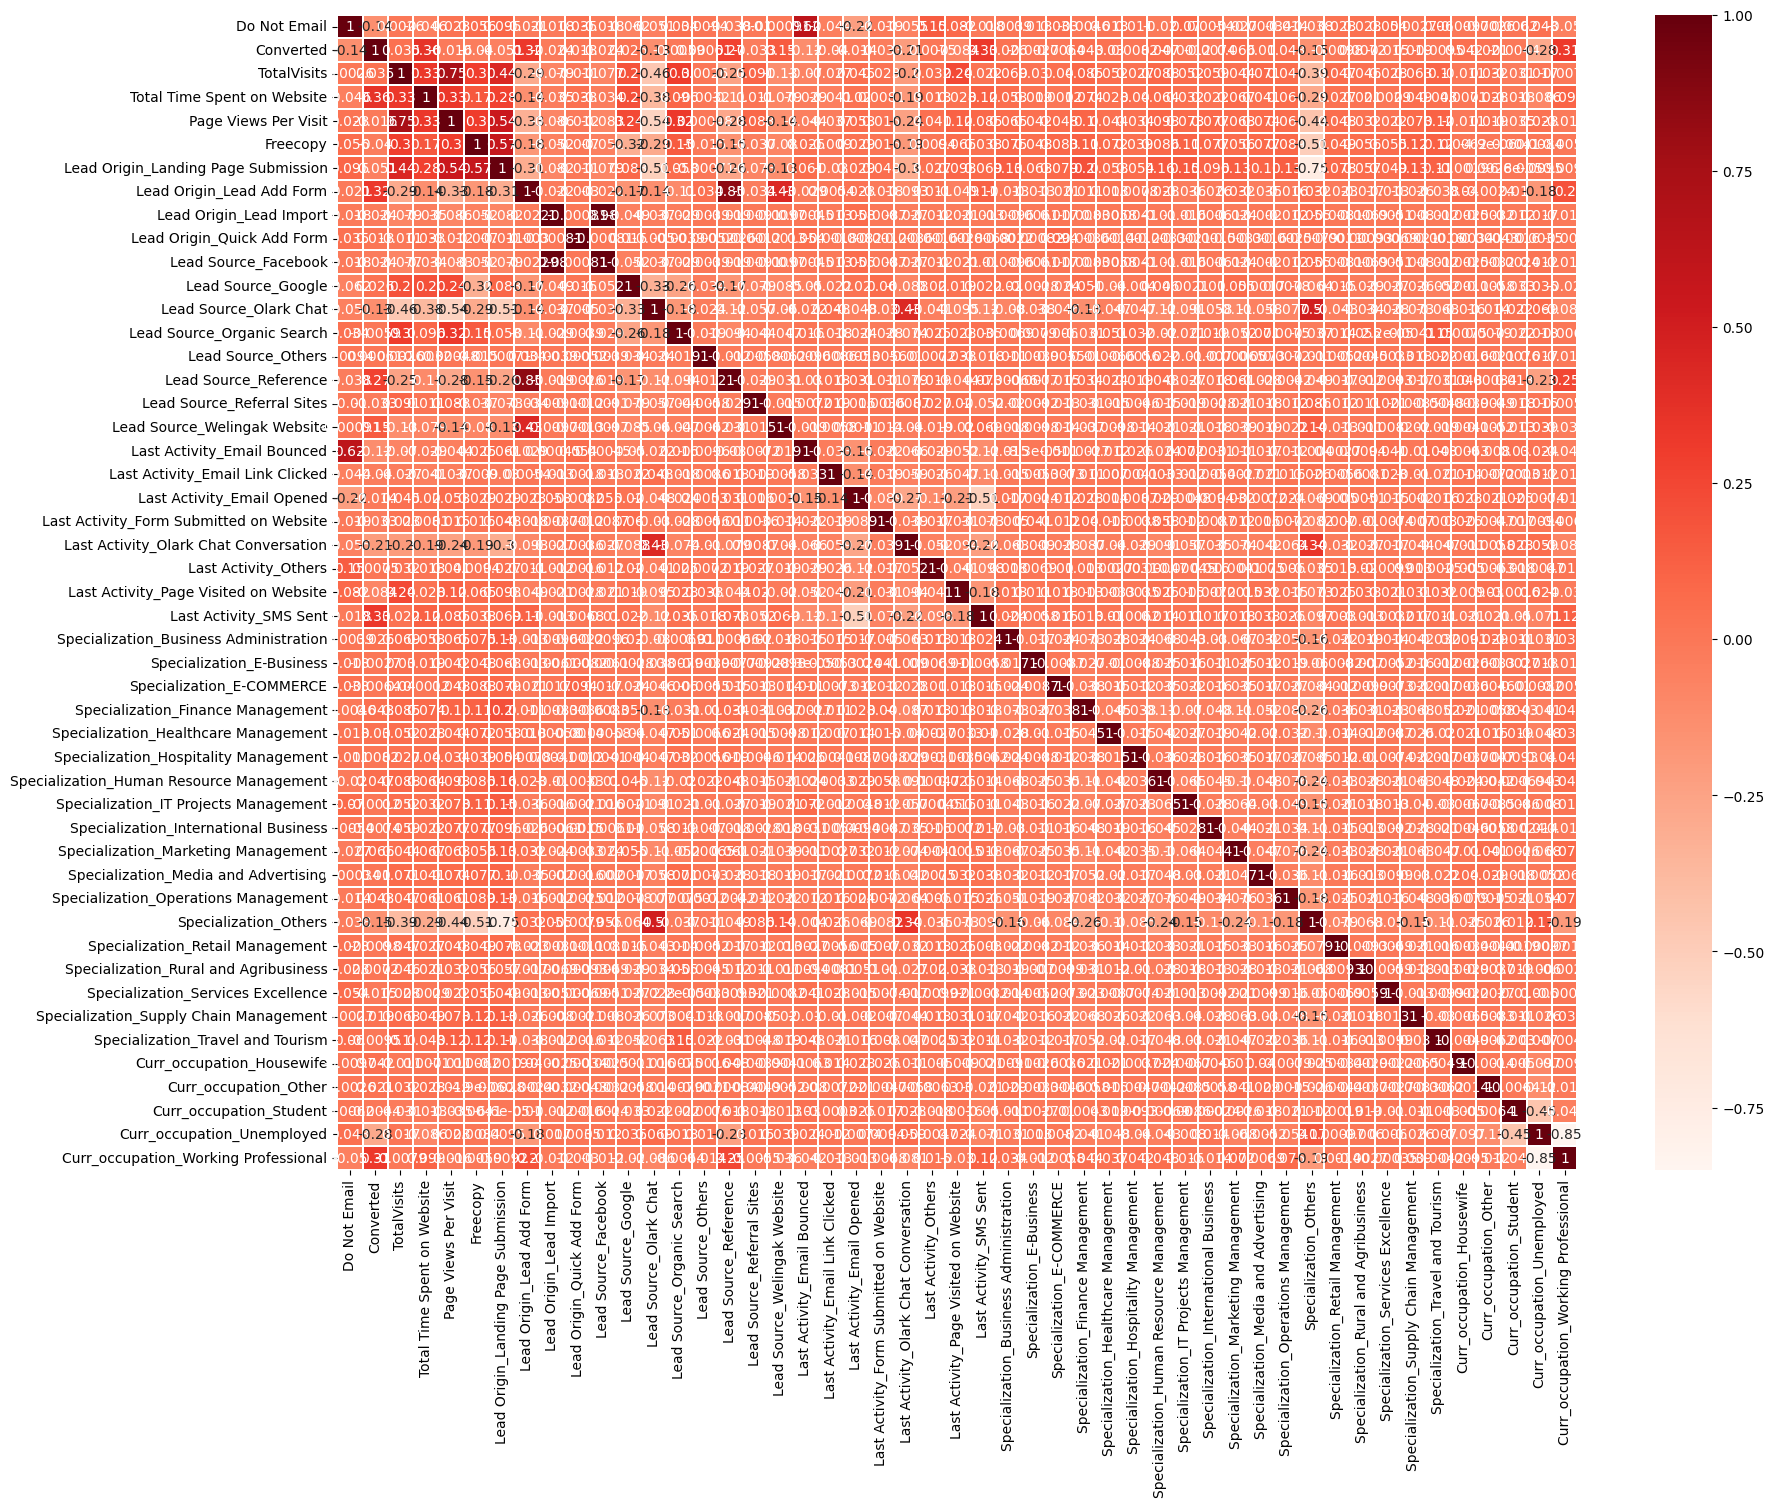

In [102]:
# analyse correlation matrix
plt.figure(figsize = (20,15))
sns.heatmap(df_leads.corr(),linewidths=0.02,cmap="Reds",annot=True)
plt.show()

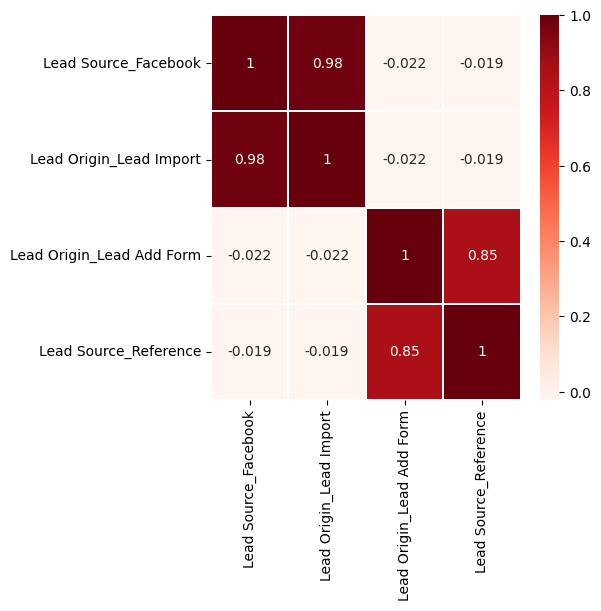

In [103]:
plt.figure(figsize = (5,5))
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Reds",annot=True)
plt.show()

 These above variables are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them.

In [104]:
#lets drop `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

#MODELLING

In [ ]:
# Feature Selection Using Recursive Feature Elimination - RFE

In [105]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [106]:
#checking the RFE output
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Freecopy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 1

In [107]:
# Checking the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
22                    Last Activity_SMS Sent            True        1
41                 Curr_occupation_Housewife            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
45      Curr_occupation_Working Professional            True        1
9                     Lead Source_Olark Chat            True        1
7                       Lead Source_Facebook            True        1
5        Lead Origin_Landing Page Submission            True        1
2                Total Time Spent on Website            True        1
44                Curr_occupation_Unemployed           False        2
42                     Curr_occupation_Other           False        3
43                   Curr_occupation_Student           False        4
37     Specialization_Rural and Agribusiness           False        5
16          Last Activity_Email Link Clicked           False        6
31     Specialization_International Business           False        7
36          Specialization_Retail Management           False        8
1                                TotalVisits           False        9
3                       Page Views Per Visit           False       10
0                               Do Not Email           False       11
21     Last Activity_Page Visited on Website           False       12
23    Specialization_Business Administration           False       13
15               Last Activity_Email Bounced           False       14
34      Specialization_Operations Management           False       15
29  Specialization_Human Resource Management           False       16
32       Specialization_Marketing Management           False       17
4                                   Freecopy           False       18
6                 Lead Origin_Quick Add Form           False       19
38        Specialization_Services Excellence           False       20
39    Specialization_Supply Chain Management           False       21
8                         Lead Source_Google           False       22
25                 Specialization_E-COMMERCE           False       23
13                Lead Source_Referral Sites           False       24
30     Specialization_IT Projects Management           False       25
27      Specialization_Healthcare Management           False       26
26         Specialization_Finance Management           False       27
10                Lead Source_Organic Search           False       28
18   Last Activity_Form Submitted on Website           False       29
33      Specialization_Media and Advertising           False       30
24                 Specialization_E-Business           False       31
40         Specialization_Travel and Tourism           False       32

In [108]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Curr_occupation_Housewife', 'Curr_occupation_Working Professional'],
      dtype='object')

In [109]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Freecopy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       

In [110]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

# Model 1

In [111]:
# Building model using statsmodels, for the detailed statistics


rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

logm1.params

const                                    -1.033284
Total Time Spent on Website               1.050544
Lead Origin_Landing Page Submission      -1.272090
Lead Source_Facebook                     -0.696059
Lead Source_Olark Chat                    0.900083
Lead Source_Others                        0.980708
Lead Source_Reference                     2.897685
Lead Source_Welingak Website              5.380227
Last Activity_Email Opened                0.950623
Last Activity_Olark Chat Conversation    -0.553411
Last Activity_Others                      1.258012
Last Activity_SMS Sent                    2.068763
Specialization_Hospitality Management    -1.072037
Specialization_Others                    -1.193681
Curr_occupation_Housewife                23.022209
Curr_occupation_Working Professional      2.685466
dtype: float64

In [112]:
# summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 18 Jul 2023   Deviance:                       5465.5
Time:                        14:54:08   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

"Current_occupation_Housewife" column can be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05.

Model 2

In [113]:
rfe_col=rfe_col.drop("Curr_occupation_Housewife")

In [114]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logm2.params

const                                   -1.025075
Total Time Spent on Website              1.049364
Lead Origin_Landing Page Submission     -1.267369
Lead Source_Facebook                    -0.696913
Lead Source_Olark Chat                   0.899051
Lead Source_Others                       0.973897
Lead Source_Reference                    2.917123
Lead Source_Welingak Website             5.379144
Last Activity_Email Opened               0.949036
Last Activity_Olark Chat Conversation   -0.558345
Last Activity_Others                     1.248172
Last Activity_SMS Sent                   2.058828
Specialization_Hospitality Management   -1.079528
Specialization_Others                   -1.197801
Curr_occupation_Working Professional     2.677350
dtype: float64

In [115]:
#summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Tue, 18 Jul 2023   Deviance:                       5480.7
Time:                        14:56:16   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

"Lead Source_Facebook" column can be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 .

# Model 3

In [116]:
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [117]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

logm3.params

const                                   -1.040542
Total Time Spent on Website              1.051824
Lead Origin_Landing Page Submission     -1.249311
Lead Source_Olark Chat                   0.916940
Lead Source_Others                       0.981395
Lead Source_Reference                    2.937179
Lead Source_Welingak Website             5.396676
Last Activity_Email Opened               0.943420
Last Activity_Olark Chat Conversation   -0.558250
Last Activity_Others                     1.248700
Last Activity_SMS Sent                   2.055550
Specialization_Hospitality Management   -1.090368
Specialization_Others                   -1.194330
Curr_occupation_Working Professional     2.675678
dtype: float64

In [118]:
#summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 18 Jul 2023   Deviance:                       5482.6
Time:                        14:57:29   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

 "Lead Source_Others" column can be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05

Model 4¶

In [ ]:
rfe_col=rfe_col.drop("Lead Source_Others")

In [119]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()

logm4.params

const                                   -1.040542
Total Time Spent on Website              1.051824
Lead Origin_Landing Page Submission     -1.249311
Lead Source_Olark Chat                   0.916940
Lead Source_Others                       0.981395
Lead Source_Reference                    2.937179
Lead Source_Welingak Website             5.396676
Last Activity_Email Opened               0.943420
Last Activity_Olark Chat Conversation   -0.558250
Last Activity_Others                     1.248700
Last Activity_SMS Sent                   2.055550
Specialization_Hospitality Management   -1.090368
Specialization_Others                   -1.194330
Curr_occupation_Working Professional     2.675678
dtype: float64

In [120]:
#Summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 18 Jul 2023   Deviance:                       5482.6
Time:                        14:58:46   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Model 4 is stable and has significant p-values

In [121]:
# checking VIFs for all variables in the Model 4
get_vif(X_train_rfe)

Features   VIF
0                   Specialization_Others  2.47
1     Lead Origin_Landing Page Submission  2.46
2              Last Activity_Email Opened  2.36
3                  Last Activity_SMS Sent  2.20
4                  Lead Source_Olark Chat  2.14
5   Last Activity_Olark Chat Conversation  1.72
6                   Lead Source_Reference  1.31
7             Total Time Spent on Website  1.24
8    Curr_occupation_Working Professional  1.21
9            Lead Source_Welingak Website  1.08
10                   Last Activity_Others  1.08
11  Specialization_Hospitality Management  1.02
12                     Lead Source_Others  1.00

 All variables have good VIF values less than 5.

We can consider Model 4 for Model Evaluation.

## Model Evaluation

In [122]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)

y_train_pred[:10]

1871    0.472170
6795    0.073458
3516    0.249410
8105    0.768821
3934    0.213196
4844    0.987881
3297    0.107734
8071    0.996112
987     0.168317
7423    0.869612
dtype: float64

In [123]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47216977, 0.07345768, 0.24941009, 0.76882113, 0.21319627,
       0.98788148, 0.10773402, 0.99611229, 0.16831745, 0.86961182])

In [124]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


Converted  Converted_Prob  Prospect ID
0          0        0.472170         1871
1          0        0.073458         6795
2          0        0.249410         3516
3          0        0.768821         8105
4          0        0.213196         3934

In [125]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.472170         1871          0
1          0        0.073458         6795          0
2          0        0.249410         3516          0
3          0        0.768821         8105          1
4          0        0.213196         3934          0

## Confusion Matrix¶

In [126]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3586  416]
 [ 844 1622]]


In [127]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


80.5% accuracy is a decent one

# Sensitivity and Specificity

In [129]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0]

In [130]:
# sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6577453365774534


In [131]:
# specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.8960519740129935


In [132]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.10394802598700649


In [133]:
# positive predictive value
print (TP / float(TP+FP))

0.7958783120706575


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8094808126410835


**ROC Curve**

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



In [136]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

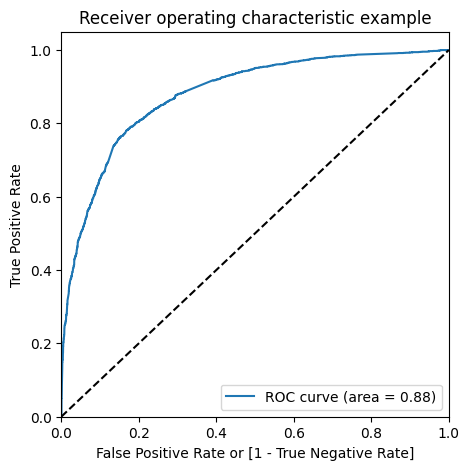

In [137]:
# ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

** Area under ROC curve is 0.88 which indicates a good predictive model**

In [138]:
# create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.472170         1871          0    1    1    1    1    1   
1          0        0.073458         6795          0    1    0    0    0    0   
2          0        0.249410         3516          0    1    1    1    0    0   
3          0        0.768821         8105          1    1    1    1    1    1   
4          0        0.213196         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [139]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.596320  0.973236  0.364068
0.2   0.2  0.721088  0.920114  0.598451
0.3   0.3  0.791280  0.833333  0.765367
0.4   0.4  0.814007  0.765612  0.843828
0.5   0.5  0.805195  0.657745  0.896052
0.6   0.6  0.793599  0.587186  0.920790
0.7   0.7  0.779375  0.507705  0.946777
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


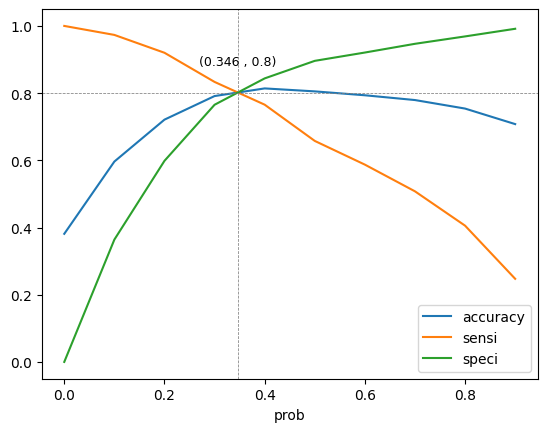

In [140]:
#  plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


** 0.346 seems to be our Optimal cutoff point for probability threshold **

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.472170         1871                1
1          0        0.073458         6795                0
2          0        0.249410         3516                0
3          0        0.768821         8105                1
4          0        0.213196         3934                0

confusion matrix for Train

In [142]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))


0.8048855905998763


In [143]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)

    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP)

    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))


In [144]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3231  771]
 [ 491 1975]] 

************************************************** 

True Negative                    :  3231
True Positive                    :  1975
False Negative                   :  491
False Positve                    :  771
Model Accuracy                   :  0.8049
Model Sensitivity                :  0.8009
Model Specificity                :  0.8073
Model Precision                  :  0.7192
Model Recall                     :  0.8009
Model True Positive Rate (TPR)   :  0.8009
Model False Positive Rate (FPR)  :  0.1927


************************************************** 



In [145]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

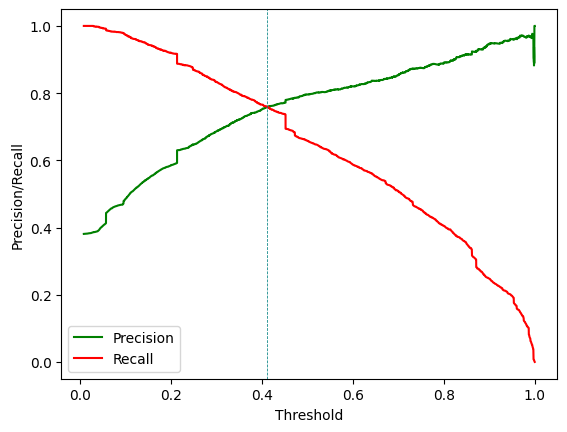

In [146]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

Here our probability threshold is 0.41 aprrox from above curve

In [147]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [148]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.472170         1871                1   
1          0        0.073458         6795                0   
2          0        0.249410         3516                0   
3          0        0.768821         8105                1   
4          0        0.213196         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [149]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")





Confusion Matrix
[[3404  598]
 [ 592 1874]] 



True Negative                    :  3404
True Positive                    :  1874
False Negative                   :  592
False Positve                    :  598
Model Accuracy                   :  0.816
Model Sensitivity                :  0.7599
Model Specificity                :  0.8506
Model Precision                  :  0.7581
Model Recall                     :  0.7599
Model True Positive Rate (TPR)   :  0.7599
Model False Positive Rate (FPR)  :  0.1494




**As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.**

# Adding Lead Score Feature to Training dataframe ¶
A higher score would mean that the lead is hot, i.e. is most likely to convert
Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [150]:
# Adding Lead Score

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.472170         1871                1          47
1          0        0.073458         6795                0           7
2          0        0.249410         3516                0          25
3          0        0.768821         8105                1          77
4          0        0.213196         3934                0          21

# Making Predictions on test set

Scaling Test dataset

In [151]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Freecopy                                  2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [152]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Others  Lead Source_Reference  \
4269                       0                   0                      0   
2376                       0                   0                      1   
7766                       0                   0                      0   
9199                       1                   0                      0   
4359                       0                   0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Curr_occupation_Working Professional  
4269                      1                                     0  
2376                      1                                     0  
7766                      0                                     1  
9199                      1                                     0  
4359                      0                                     0

**Prediction on Test Dataset using final model**

In [154]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [155]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [156]:
# top 10 columns
y_test_pred[:10]

4269    0.697446
2376    0.861357
7766    0.887568
9199    0.056924
4359    0.870885
9186    0.503070
1631    0.418704
8963    0.153564
8007    0.071821
5324    0.297836
dtype: float64

In [157]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697446
2376  0.861357
7766  0.887568
9199  0.056924
4359  0.870885

In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [159]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.697446
1          1         2376  0.861357
2          1         7766  0.887568
3          0         9199  0.056924
4          1         4359  0.870885

In [160]:
# Renaming and Rearranging the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.697446
1         2376          1        0.861357
2         7766          1        0.887568
3         9199          0        0.056924
4         4359          1        0.870885

In [161]:
# taking sensitivity-specificity method at 0.34 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.697446                1
1         2376          1        0.861357                1
2         7766          1        0.887568                1
3         9199          0        0.056924                0
4         4359          1        0.870885                1

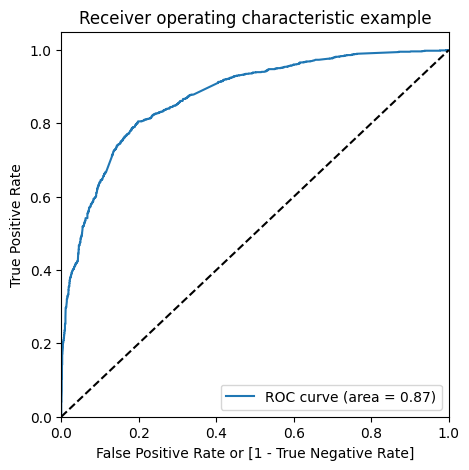

In [162]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

**Area under ROC curve is 0.87 out of 1 which indicates a good predictive model**

Test set Model Evaluation

In [163]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")



Confusion Matrix
[[1346  331]
 [ 216  879]] 



True Negative                    :  1346
True Positive                    :  879
False Negative                   :  216
False Positve                    :  331
Model Accuracy                   :  0.8027
Model Sensitivity                :  0.8027
Model Specificity                :  0.8026
Model Precision                  :  0.7264
Model Recall                     :  0.8027
Model True Positive Rate (TPR)   :  0.8027
Model False Positive Rate (FPR)  :  0.1974




# The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently .

**For Test set
Accuracy : 80.23%
Sensitivity : 80.27%
Specificity : 80.20% **

In [164]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website             5.396676
Lead Source_Reference                    2.937179
Curr_occupation_Working Professional     2.675678
Last Activity_SMS Sent                   2.055550
Last Activity_Others                     1.248700
Total Time Spent on Website              1.051824
Lead Source_Others                       0.981395
Last Activity_Email Opened               0.943420
Lead Source_Olark Chat                   0.916940
Last Activity_Olark Chat Conversation   -0.558250
const                                   -1.040542
Specialization_Hospitality Management   -1.090368
Specialization_Others                   -1.194330
Lead Origin_Landing Page Submission     -1.249311
dtype: float64

#  A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads for coversion of leads.

In [165]:
# Adding Lead Score

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.697446                1          70
1         2376          1        0.861357                1          86
2         7766          1        0.887568                1          89
3         9199          0        0.056924                0           6
4         4359          1        0.870885                1          87

**Lead Score: The customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.**

# **Conclusion
NOTE: The model is performing consistently across different evaluation metrics in both test and train dataset.

The model achieved a `sensitivity of 80.27% in the test set, using a cut-off value of 0.34.
The model also achieved an accuracy of 80.23%, which is in line with the study's objectives.**

 **Model parameters
The final Logistic Regression Model has 13 features**

# Top 3 features that contributing positively to predicting hot leads in the model are:¶
Lead Source_Welingak Website

Lead Source_Reference

Current_occupation_Working Professional

NOTE: The Optimal cutoff probability point is 0.34.Converted probability greater than 0.34 will be predicted as Converted lead (Hot lead).

OBSERVATIONS
-- To increase LCR Lead Conversion Rates:
Strategies to be developed to attract high-quality leads from top-performing lead sources.
Optimize communication channels based on lead engagement impact.
More budget can be spent on Welingak Website in terms of advertising, etc.
Incentives/discounts for providing references that convert to leads.
Working professionals to be targeted as they have high conversion rate and will have better financial situation to pay fees.
-- To identify areas of improvement:
Analyze negative coefficients in specialization offerings.
Review landing page submission process .